DSCI 100 Group Project Proposal
Does Age and Ground Type Impact a Tennis Player's Performance?

Introduction:

Ultimate Tennis is an international competition between some of the world’s best tennis players each year. Between the years 2017 and 2019, the data of the top 500 players in the Open Era men’s tennis were collected by Jeff Sackmann in the dataset atp_2017-2019.csv. That said, our project will focus on identifying if the age of the players impacts their performance. In addition, our project will identify if there is a correlation between the ground type of the match and the age of the winning player. We will be using a classification method for this project.


In [18]:
#Preliminary Exploratory Data Analysis:

library(tidyverse)
library(repr)
library(ggplot2)
library(gridExtra)
library(stringr)

In [2]:
tennis <- read_csv("data/atp2017-2019.csv")

tennis_data <- tennis %>%
  select(winner_age, loser_age, surface,loser_rank, winner_rank, minutes) %>%
  mutate(surface_type = case_when(
    surface == "Hard" ~ "Hard",
    surface == "Clay" ~ "Clay",
    surface == "Grass" ~ "Grass",
    TRUE ~ NA_character_
  )) %>%
  select(surface_type, winner_age, loser_age, loser_rank, winner_rank, minutes) %>%
  filter(!is.na(winner_age) & !is.na(loser_age) & !is.na(surface_type) & 
         !is.na(loser_rank) & !is.na(winner_rank) & !is.na(minutes))

tennis_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


surface_type,winner_age,loser_age,loser_rank,winner_rank,minutes
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hard,29.00479,22.88569,16,9,124
Hard,22.88569,33.70568,239,16,82
Hard,29.00479,31.88227,40,9,66
Hard,33.70568,19.86858,31,239,106
Hard,22.88569,28.01095,18,16,129
Hard,31.88227,26.40383,185,40,127
Hard,29.00479,27.62765,19,9,100
Hard,33.70568,25.92471,77,239,100
Hard,19.86858,24.69815,72,31,80


In [3]:
tennis_summary_avg <- tennis_data %>%
  group_by(surface_type) %>%
  summarize(
    avg_winner_age = mean(winner_age),
    avg_loser_age = mean(loser_age),
    avg_winner_rank = mean(winner_rank),
    avg_loser_rank = mean(loser_rank),
    avg_minutes = mean(minutes)
  )

tennis_summary_avg

tennis_summary_sd <- tennis_data %>%
  group_by(surface_type) %>%
  summarize(
    sd_winner_age = sd(winner_age),
    sd_loser_age = sd(loser_age),
    sd_winner_rank = sd(winner_rank),
    sd_loser_rank = sd(loser_rank),
    sd_minutes = sd(minutes)
  )

tennis_summary_sd

surface_type,avg_winner_age,avg_loser_age,avg_winner_rank,avg_loser_rank,avg_minutes
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Clay,27.48083,27.50445,64.32585,88.01171,113.3663
Grass,28.63200,27.75809,56.61366,89.94534,114.4248
Hard,27.59358,27.45655,55.11120,78.98009,108.3651


surface_type,sd_winner_age,sd_loser_age,sd_winner_rank,sd_loser_rank,sd_minutes
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Clay,4.288167,4.416129,66.12049,97.75605,44.51360
Grass,4.622021,4.537946,58.57980,97.25406,44.74403
Hard,4.621770,4.510735,64.10269,87.58580,40.52274


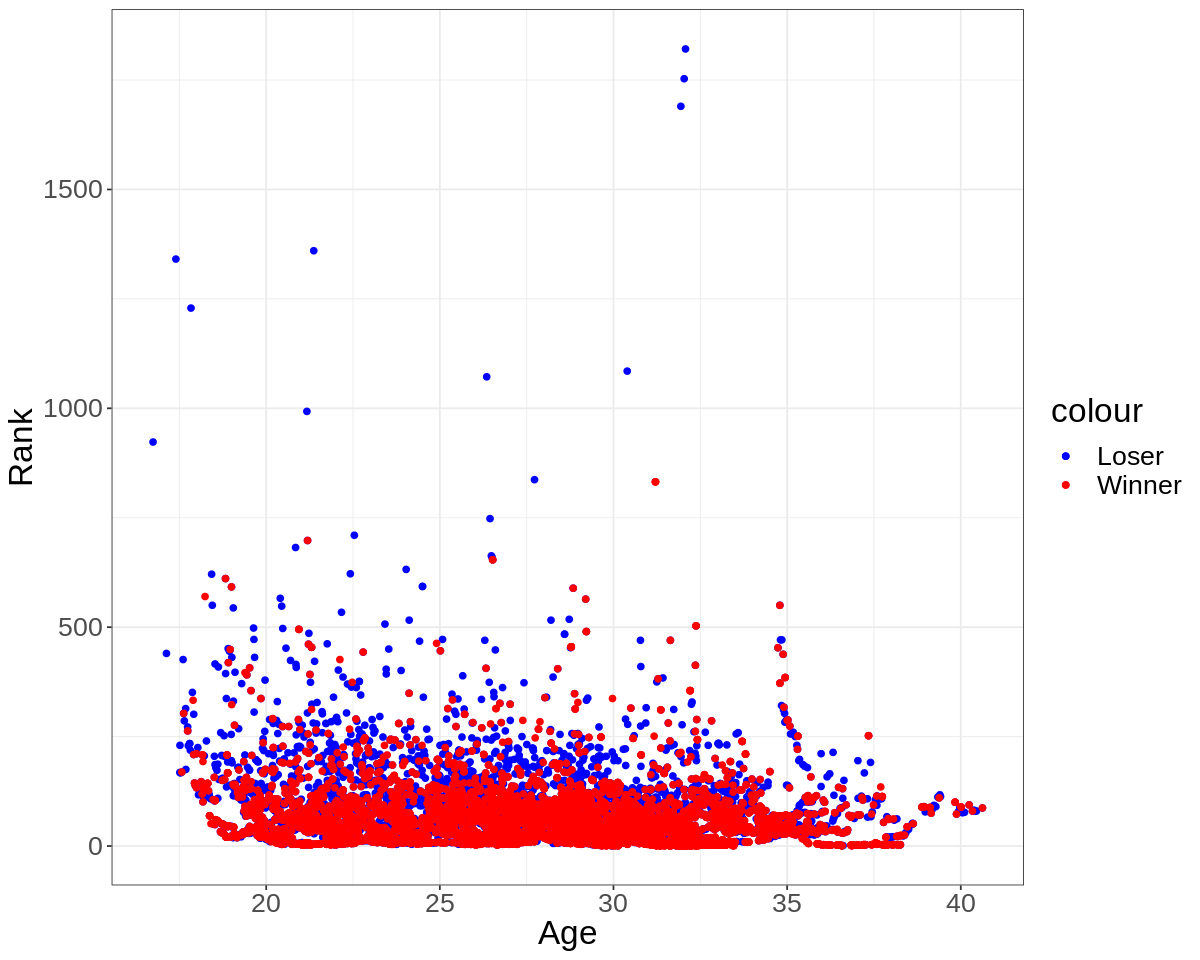

In [16]:
options(repr.plot.width = 10, repr.plot.height = 8)

ggplot(tennis_data, aes(x = loser_age, y = loser_rank)) +
  geom_point(aes(color = "Loser")) +
  geom_point(aes(x = winner_age, y = winner_rank, color = "Winner")) +
  scale_color_manual(values = c("Loser" = "blue", "Winner" = "red")) +
  xlab("Age") +
  ylab("Rank") +
  theme_bw() +
  theme( text = element_text(size = 20))



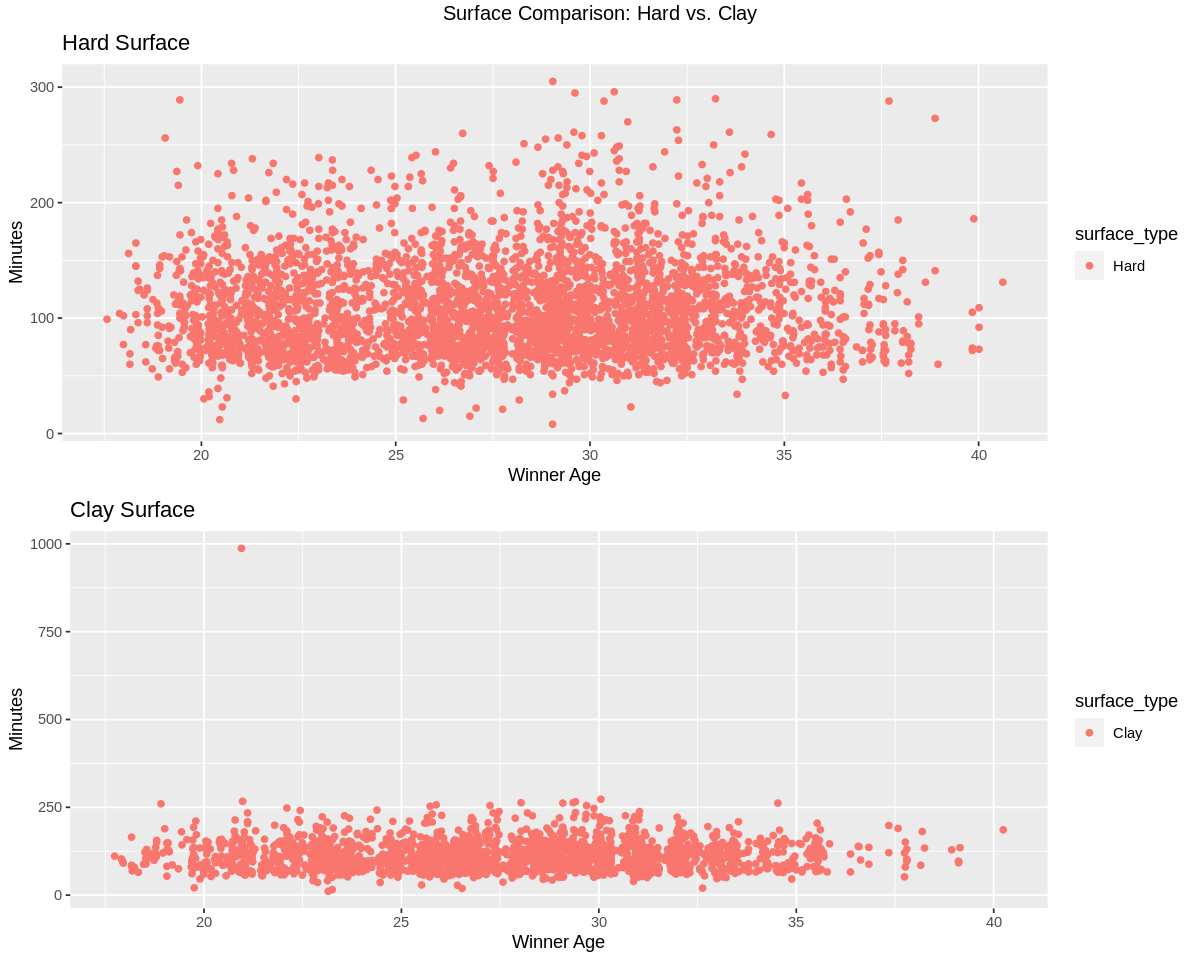

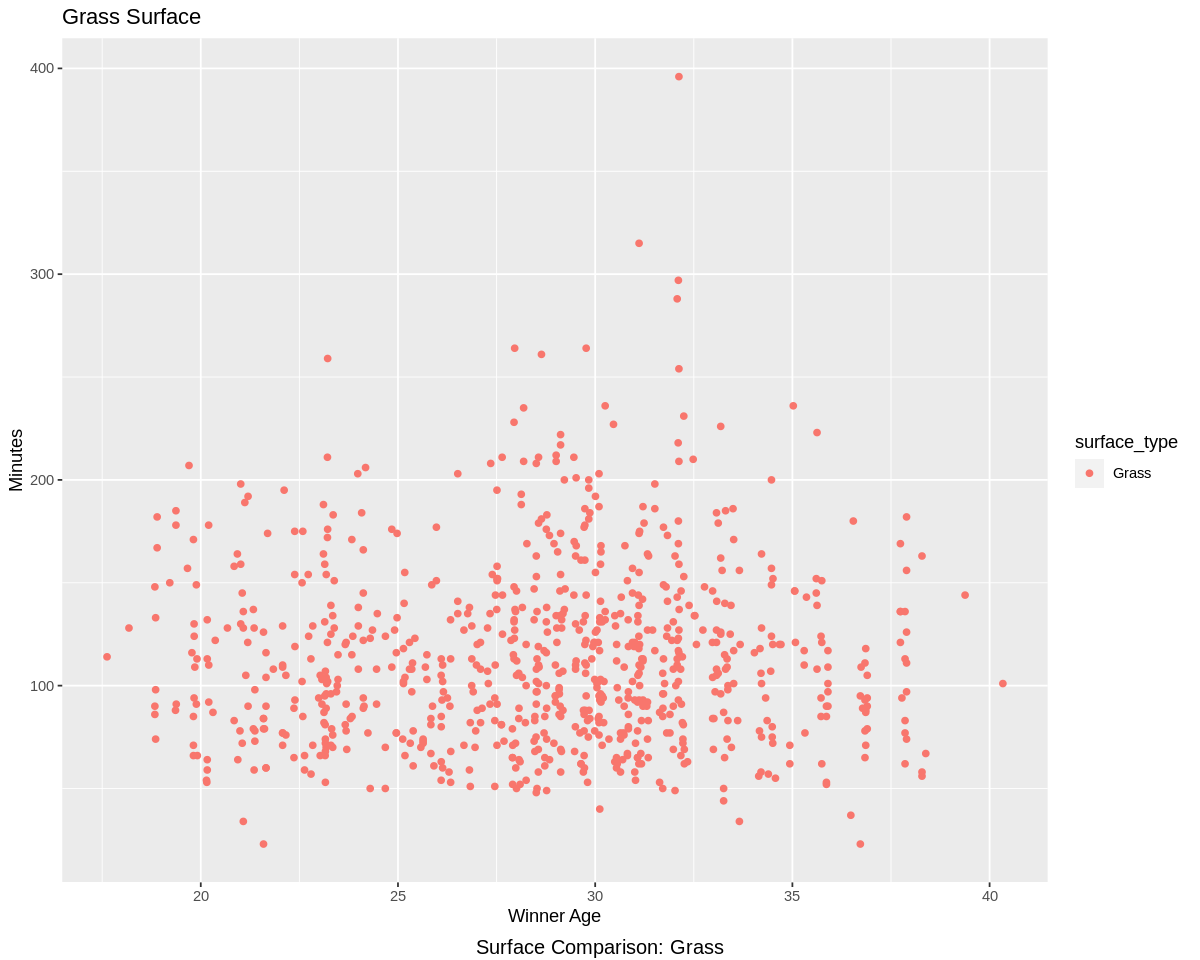

In [19]:
# hard surface
hard_plot <- ggplot(data = filter(tennis_data, surface_type == "Hard"),
                    aes(x = winner_age, y = minutes)) +
  geom_point(aes(color = surface_type)) +
  labs(title = "Hard Surface",
       x = "Winner Age",
       y = "Minutes")

# clay surface
clay_plot <- ggplot(data = filter(tennis_data, surface_type == "Clay"),
                    aes(x = winner_age, y = minutes)) +
  geom_point(aes(color = surface_type)) +
  labs(title = "Clay Surface",
       x = "Winner Age",
       y = "Minutes")

# grass surface
grass_plot <- ggplot(data = filter(tennis_data, surface_type == "Grass"),
                     aes(x = winner_age, y = minutes)) +
  geom_point(aes(color = surface_type)) +
  labs(title = "Grass Surface",
       x = "Winner Age",
       y = "Minutes")

# Arrange the plots 
grid.arrange(hard_plot, clay_plot, ncol = 1, top = "Surface Comparison: Hard vs. Clay", heights = c(1, 1))
grid.arrange(grass_plot, ncol = 1, bottom = "Surface Comparison: Grass", heights = c(1))


Methods:

We will be using the columns winner_age, loser_age, surface, loser_rank, winner_rank, as well as minutes to analysis the data. 

We will visualize the results in the following way:
1) We can compare age and rank using 500 datapoints.
2) We can also compare winning ages against match time, to see if it takes shorter or longer to win with age, and also color code it or have a multiple plots to see if there may be any correlation to the ground type used in the match.


Expected Outcome and Significance:

We expect to find out if age affects a player's performance. If a player is older, their rank is higher, so the two have a positive relationship. Since the players are more experienced, they would have a higher chance of winning the game. By drawing separate plots based on the surface column representing the ground type, we are trying to see if ground type also affects the player’s performance. We predict hard grounds would result in higher performance. Eventually, by finding the relationship between ground type and performance, we can check if the ground type significantly impacts the player’s result in the game. If it does, then different rules should be applied depending on what type of ground the players are having tournaments to have a fair game. Our research result can lead to future questions if our findings would apply the same to women players since our data is limited to only the games in the Open Era men’s tennis. Moreover, we can ask the same question with a wider range of data since the data focuses on games from 2017 to 2019. 
